# [Your full name goes here]
# Programming Exercise \#4
---

# Preamble

In [5]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [6]:
# import relevant Python libraries

### Your import commands go here ###

# **1. Machine Learning for Diagnosis of 'Senioritis'**

## Problem 1.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Load
train = pd.read_csv('SenioritisTrainingData.csv')
test = pd.read_csv('SenioritisTestData.csv')

def plot_data(df, title):
    healthy = df[df['ClassLabel'] == 'No Senioritis']
    sick    = df[df['ClassLabel'] == 'Senioritis']

    plt.figure(figsize=(6,5))
    plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='Healthy')
    plt.scatter(sick['ChemA'],    sick['ChemB'],    color='red',   label='Senioritis')

    plt.xlabel('ChemA Concentration')
    plt.ylabel('ChemB Concentration')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

#Training data plot
plot_data(train, 'Training Data: ChemA vs ChemB')

#Test data plot
plot_data(test, 'Test Data: ChemA vs ChemB')


## Problem 1.2

### (a)

In [8]:
import numpy as np

train_healthy = train[train['ClassLabel'] == 'No Senioritis'][['ChemA', 'ChemB']].values
train_sick = train[train['ClassLabel'] == 'Senioritis'][['ChemA', 'ChemB']].values

#Compute
mu0 = np.mean(train_healthy, axis=0)
mu1 = np.mean(train_sick, axis=0)

cov0 = np.cov(train_healthy.T)
cov1 = np.cov(train_sick.T)
n0 = len(train_healthy)
n1 = len(train_sick)

Sigma = ((n0 - 1) * cov0 + (n1 - 1) * cov1) / (n0 + n1 - 2)

pi0 = n0 / (n0 + n1)
pi1 = n1 / (n0 + n1)

Sigma_inv = np.linalg.inv(Sigma)

def lda_predict(x):
    x = np.atleast_2d(x)
    g0 = x @ Sigma_inv @ mu0 - 0.5 * mu0.T @ Sigma_inv @ mu0 + np.log(pi0)
    g1 = x @ Sigma_inv @ mu1 - 0.5 * mu1.T @ Sigma_inv @ mu1 + np.log(pi1)
    return np.where(g1 > g0, 'Senioritis', 'No Senioritis')

print("Example LDA prediction:", lda_predict([[0, 1]]))

Example LDA prediction: ['No Senioritis']


### (b)

In [9]:
cov0_qda = np.cov(train_healthy.T)
cov1_qda = np.cov(train_sick.T)

inv_cov0_qda = np.linalg.inv(cov0_qda)
inv_cov1_qda = np.linalg.inv(cov1_qda)

logdet_cov0_qda = np.log(np.linalg.det(cov0_qda))
logdet_cov1_qda = np.log(np.linalg.det(cov1_qda))

def qda_predict(x):
    x = np.atleast_2d(x)
    diff0 = x - mu0
    diff1 = x - mu1
    g0 = -0.5 * np.sum(diff0 @ inv_cov0_qda * diff0, axis=1) - 0.5 * logdet_cov0_qda + np.log(pi0)
    g1 = -0.5 * np.sum(diff1 @ inv_cov1_qda * diff1, axis=1) - 0.5 * logdet_cov1_qda + np.log(pi1)
    return np.where(g1 > g0, 'Senioritis', 'No Senioritis')

print("Example QDA prediction:", qda_predict([[0, 1]]))

Example QDA prediction: ['No Senioritis']


### (c)

In [10]:
import numpy as np

var0 = np.var(train_healthy, axis=0, ddof=1)
var1 = np.var(train_sick, axis=0, ddof=1)

const0 = np.sum(np.log(2 * np.pi * var0))
const1 = np.sum(np.log(2 * np.pi * var1))

def gnb_predict(x):
    x = np.atleast_2d(x)
    diff0 = x - mu0
    diff1 = x - mu1
    ll0 = -0.5 * (const0 + np.sum((diff0 ** 2) / var0, axis=1))
    ll1 = -0.5 * (const1 + np.sum((diff1 ** 2) / var1, axis=1))
    g0 = ll0 + np.log(pi0)
    g1 = ll1 + np.log(pi1)
    return np.where(g1 > g0, 'Senioritis', 'No Senioritis')

print("Example GNB prediction:", gnb_predict([[0, 1]]))

Example GNB prediction: ['No Senioritis']


### (d)

In [11]:
import numpy as np

X_train = train[['ChemA', 'ChemB']].values
y_train = train['ClassLabel'].values

def knn_predict(x, k=3):
    x = np.atleast_2d(x)
    preds = []
    for xi in x:
        dists = np.linalg.norm(X_train - xi, axis=1)
        idx = np.argsort(dists)[:k]
        neighbors = y_train[idx]
        vals, counts = np.unique(neighbors, return_counts=True)
        preds.append(vals[np.argmax(counts)])
    return np.array(preds)

print("Example k-NN prediction (k=3):", knn_predict([[0, 1]], k=3))

Example k-NN prediction (k=3): ['Senioritis']


## Problem 1.3

### (a)

In [12]:
import numpy as np
import pandas as pd

test = pd.read_csv('SenioritisTestData.csv')

X_test = test[['ChemA', 'ChemB']].values
y_test = test['ClassLabel'].values

def prob_error(pred, y_true):
    return np.mean(pred != y_true)

pred_lda = lda_predict(X_test)
pred_qda = qda_predict(X_test)
pred_gnb = gnb_predict(X_test)
pred_knn = knn_predict(X_test, k=3)

err_lda = prob_error(pred_lda, y_test)
err_qda = prob_error(pred_qda, y_test)
err_gnb = prob_error(pred_gnb, y_test)
err_knn = prob_error(pred_knn, y_test)

print("Empirical probability of misclassification on test data:")
print(f"LDA: {err_lda:.4f}")
print(f"QDA: {err_qda:.4f}")
print(f"GNB: {err_gnb:.4f}")
print(f"k-NN (k=3): {err_knn:.4f}")

Empirical probability of misclassification on test data:
LDA: 0.0850
QDA: 0.0900
GNB: 0.0850
k-NN (k=3): 0.0950


### (b)

In [13]:
import numpy as np

def tp_tpr(pred, y_true):
    positive = (y_true == 'Senioritis')
    tp = np.sum((pred == 'Senioritis') & positive)
    tpr = tp / np.sum(positive)
    return tp, tpr

tp_lda, tpr_lda = tp_tpr(pred_lda, y_test)
tp_qda, tpr_qda = tp_tpr(pred_qda, y_test)
tp_gnb, tpr_gnb = tp_tpr(pred_gnb, y_test)
tp_knn, tpr_knn = tp_tpr(pred_knn, y_test)

print("True positives (TP) and true positive rate (TPR) on test data:")
print(f"LDA: TP = {tp_lda},  TPR = {tpr_lda:.4f}")
print(f"QDA: TP = {tp_qda},  TPR = {tpr_qda:.4f}")
print(f"GNB: TP = {tp_gnb},  TPR = {tpr_gnb:.4f}")
print(f"k-NN (k=3): TP = {tp_knn},  TPR = {tpr_knn:.4f}")

True positives (TP) and true positive rate (TPR) on test data:
LDA: TP = 89,  TPR = 0.8900
QDA: TP = 88,  TPR = 0.8800
GNB: TP = 86,  TPR = 0.8600
k-NN (k=3): TP = 91,  TPR = 0.9100


### (c)

In [14]:
import numpy as np

def fp_fpr(pred, y_true):
    negative = (y_true == 'No Senioritis')
    fp = np.sum((pred == 'Senioritis') & negative)
    fpr = fp / np.sum(negative)
    return fp, fpr

fp_lda, fpr_lda = fp_fpr(pred_lda, y_test)
fp_qda, fpr_qda = fp_fpr(pred_qda, y_test)
fp_gnb, fpr_gnb = fp_fpr(pred_gnb, y_test)
fp_knn, fpr_knn = fp_fpr(pred_knn, y_test)

print("False positives (FP) and false positive rate (FPR) on test data:")
print(f"LDA: FP = {fp_lda},  FPR = {fpr_lda:.4f}")
print(f"QDA: FP = {fp_qda},  FPR = {fpr_qda:.4f}")
print(f"GNB: FP = {fp_gnb},  FPR = {fpr_gnb:.4f}")
print(f"k-NN (k=3): FP = {fp_knn},  FPR = {fpr_knn:.4f}")

False positives (FP) and false positive rate (FPR) on test data:
LDA: FP = 6,  FPR = 0.0600
QDA: FP = 6,  FPR = 0.0600
GNB: FP = 3,  FPR = 0.0300
k-NN (k=3): FP = 10,  FPR = 0.1000


### (d)

In [15]:
import numpy as np

def tn_tnr(pred, y_true):
    negative = (y_true == 'No Senioritis')
    tn = np.sum((pred == 'No Senioritis') & negative)
    tnr = tn / np.sum(negative)
    return tn, tnr

tn_lda, tnr_lda = tn_tnr(pred_lda, y_test)
tn_qda, tnr_qda = tn_tnr(pred_qda, y_test)
tn_gnb, tnr_gnb = tn_tnr(pred_gnb, y_test)
tn_knn, tnr_knn = tn_tnr(pred_knn, y_test)

print("True negatives (TN) and true negative rate (TNR) on test data:")
print(f"LDA: TN = {tn_lda},  TNR = {tnr_lda:.4f}")
print(f"QDA: TN = {tn_qda},  TNR = {tnr_qda:.4f}")
print(f"GNB: TN = {tn_gnb},  TNR = {tnr_gnb:.4f}")
print(f"k-NN (k=3): TN = {tn_knn},  TNR = {tnr_knn:.4f}")

True negatives (TN) and true negative rate (TNR) on test data:
LDA: TN = 94,  TNR = 0.9400
QDA: TN = 94,  TNR = 0.9400
GNB: TN = 97,  TNR = 0.9700
k-NN (k=3): TN = 90,  TNR = 0.9000


### (e)

In [16]:
import numpy as np

def fn_fnr(pred, y_true):
    positive = (y_true == 'Senioritis')
    fn = np.sum((pred == 'No Senioritis') & positive)
    fnr = fn / np.sum(positive)
    return fn, fnr

fn_lda, fnr_lda = fn_fnr(pred_lda, y_test)
fn_qda, fnr_qda = fn_fnr(pred_qda, y_test)
fn_gnb, fnr_gnb = fn_fnr(pred_gnb, y_test)
fn_knn, fnr_knn = fn_fnr(pred_knn, y_test)

print("False negatives (FN) and false negative rate (FNR) on test data:")
print(f"LDA: FN = {fn_lda},  FNR = {fnr_lda:.4f}")
print(f"QDA: FN = {fn_qda},  FNR = {fnr_qda:.4f}")
print(f"GNB: FN = {fn_gnb},  FNR = {fnr_gnb:.4f}")
print(f"k-NN (k=3): FN = {fn_knn},  FNR = {fnr_knn:.4f}")

False negatives (FN) and false negative rate (FNR) on test data:
LDA: FN = 11,  FNR = 0.1100
QDA: FN = 12,  FNR = 0.1200
GNB: FN = 14,  FNR = 0.1400
k-NN (k=3): FN = 9,  FNR = 0.0900


## Problem 1.4

_[I would recommend using the QDA classifier for diagnosing Senioritis. QDA had the lower overall probability of misclassification and also showed a balance combination of high true positives rates and low false negative rates; so it showed students with Senioritis better than the other model. The false positive rate was low, so it did not incorrectly classify many healthy students as sick. Even in a statistical stance, the underlying data for each class comes from Gaussian distribution with different covariance structures, so that is why QDA is the most consistent one. ]_

## Problem 1.5

### (a)

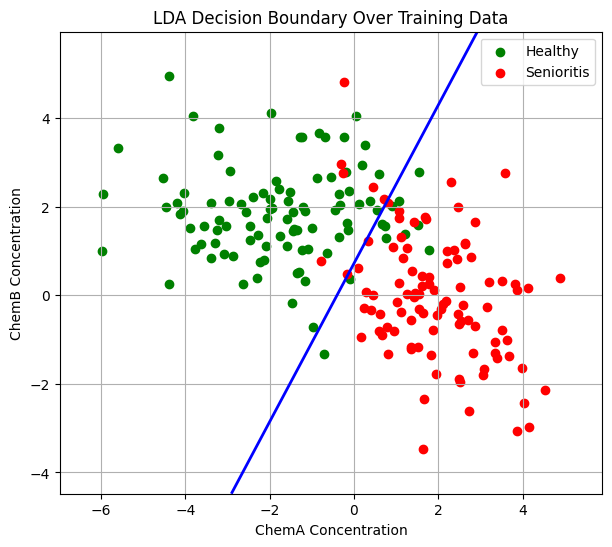

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid covering the ChemA–ChemB space
x_min, x_max = train['ChemA'].min() - 1, train['ChemA'].max() + 1
y_min, y_max = train['ChemB'].min() - 1, train['ChemB'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]

g0 = grid @ Sigma_inv @ mu0 - 0.5 * mu0.T @ Sigma_inv @ mu0 + np.log(pi0)
g1 = grid @ Sigma_inv @ mu1 - 0.5 * mu1.T @ Sigma_inv @ mu1 + np.log(pi1)

boundary = (g1 - g0).reshape(xx.shape)

plt.figure(figsize=(7,6))

healthy = train[train['ClassLabel'] == 'No Senioritis']
sick = train[train['ClassLabel'] == 'Senioritis']

plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='Healthy')
plt.scatter(sick['ChemA'], sick['ChemB'], color='red', label='Senioritis')

plt.contour(xx, yy, boundary, levels=[0], colors='blue', linewidths=2)

plt.xlabel('ChemA Concentration')
plt.ylabel('ChemB Concentration')
plt.title('LDA Decision Boundary Over Training Data')
plt.legend()
plt.grid(True)
plt.show()

### (b)

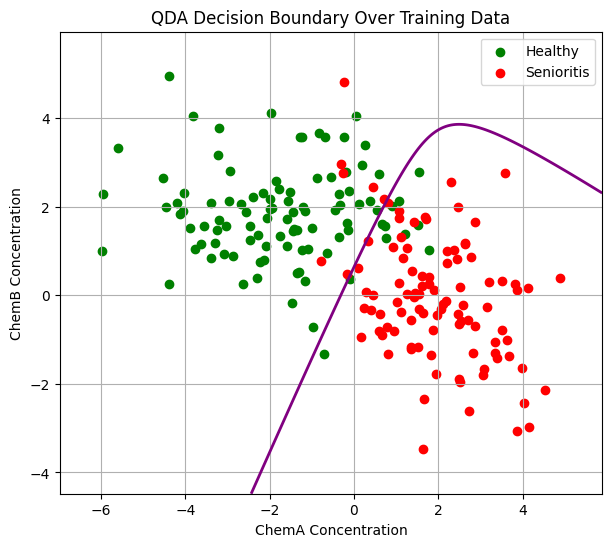

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = train['ChemA'].min() - 1, train['ChemA'].max() + 1
y_min, y_max = train['ChemB'].min() - 1, train['ChemB'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]

diff0 = grid - mu0
diff1 = grid - mu1

g0 = -0.5 * np.sum(diff0 @ inv_cov0_qda * diff0, axis=1) - 0.5 * logdet_cov0_qda + np.log(pi0)
g1 = -0.5 * np.sum(diff1 @ inv_cov1_qda * diff1, axis=1) - 0.5 * logdet_cov1_qda + np.log(pi1)

boundary_qda = (g1 - g0).reshape(xx.shape)

plt.figure(figsize=(7,6))

healthy = train[train['ClassLabel'] == 'No Senioritis']
sick = train[train['ClassLabel'] == 'Senioritis']

plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='Healthy')
plt.scatter(sick['ChemA'], sick['ChemB'], color='red', label='Senioritis')

plt.contour(xx, yy, boundary_qda, levels=[0], colors='purple', linewidths=2)

plt.xlabel('ChemA Concentration')
plt.ylabel('ChemB Concentration')
plt.title('QDA Decision Boundary Over Training Data')
plt.legend()
plt.grid(True)
plt.show()

### (c)

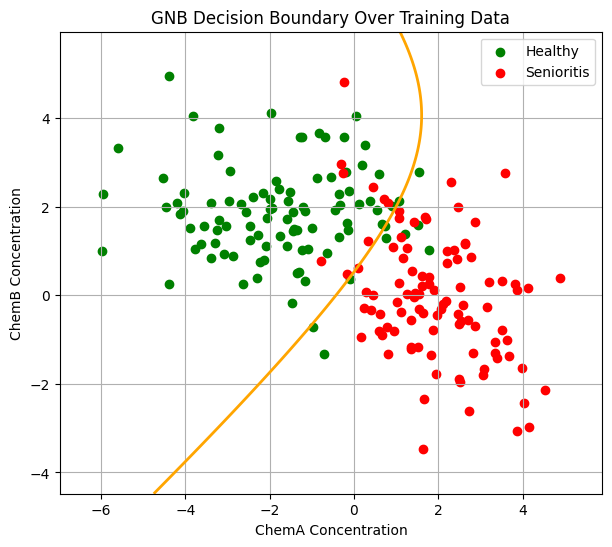

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = train['ChemA'].min() - 1, train['ChemA'].max() + 1
y_min, y_max = train['ChemB'].min() - 1, train['ChemB'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]

diff0 = grid - mu0
diff1 = grid - mu1

ll0 = -0.5 * (np.sum((diff0 ** 2) / var0, axis=1) + np.sum(np.log(2 * np.pi * var0)))
ll1 = -0.5 * (np.sum((diff1 ** 2) / var1, axis=1) + np.sum(np.log(2 * np.pi * var1)))

g0 = ll0 + np.log(pi0)
g1 = ll1 + np.log(pi1)

boundary_gnb = (g1 - g0).reshape(xx.shape)

plt.figure(figsize=(7,6))

healthy = train[train['ClassLabel'] == 'No Senioritis']
sick = train[train['ClassLabel'] == 'Senioritis']

plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='Healthy')
plt.scatter(sick['ChemA'], sick['ChemB'], color='red', label='Senioritis')

plt.contour(xx, yy, boundary_gnb, levels=[0], colors='orange', linewidths=2)

plt.xlabel('ChemA Concentration')
plt.ylabel('ChemB Concentration')
plt.title('GNB Decision Boundary Over Training Data')
plt.legend()
plt.grid(True)
plt.show()

### (d)

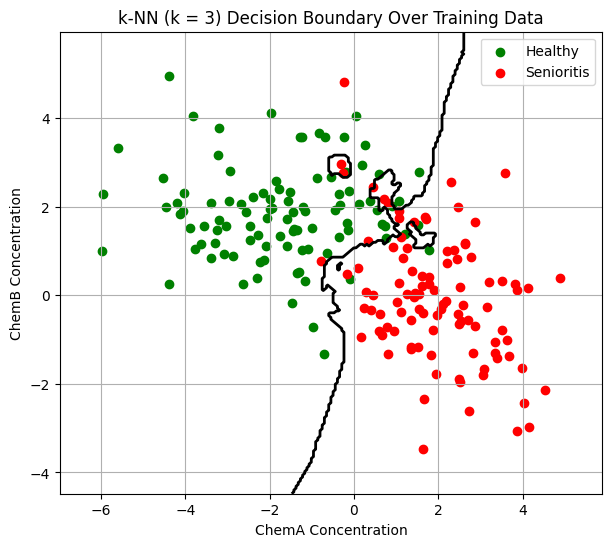

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = train['ChemA'].min() - 1, train['ChemA'].max() + 1
y_min, y_max = train['ChemB'].min() - 1, train['ChemB'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                     np.linspace(y_min, y_max, 250))

grid = np.c_[xx.ravel(), yy.ravel()]

grid_pred = knn_predict(grid, k=3)
grid_num = np.where(grid_pred == 'Senioritis', 1, 0).reshape(xx.shape)

plt.figure(figsize=(7,6))

healthy = train[train['ClassLabel'] == 'No Senioritis']
sick = train[train['ClassLabel'] == 'Senioritis']

plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='Healthy')
plt.scatter(sick['ChemA'], sick['ChemB'], color='red', label='Senioritis')

plt.contour(xx, yy, grid_num, levels=[0.5], colors='black', linewidths=2)

plt.xlabel('ChemA Concentration')
plt.ylabel('ChemB Concentration')
plt.title('k-NN (k = 3) Decision Boundary Over Training Data')
plt.legend()
plt.grid(True)
plt.show()

### (e)

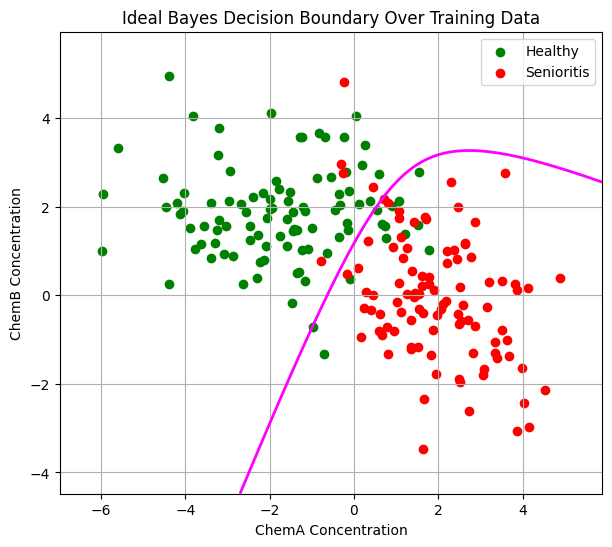

In [21]:
import numpy as np
import matplotlib.pyplot as plt

mu0_b = np.array([-2, 2])
mu1_b = np.array([2, 0])

C0 = np.array([[3, 0],
               [0, 1]])
C1 = np.array([[2, -1],
               [-1, 2]])

invC0 = np.linalg.inv(C0)
invC1 = np.linalg.inv(C1)

logdetC0 = np.log(np.linalg.det(C0))
logdetC1 = np.log(np.linalg.det(C1))

pi0_b = 0.5
pi1_b = 0.5

x_min, x_max = train['ChemA'].min() - 1, train['ChemA'].max() + 1
y_min, y_max = train['ChemB'].min() - 1, train['ChemB'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]

diff0 = grid - mu0_b
diff1 = grid - mu1_b

g0 = -0.5 * np.sum(diff0 @ invC0 * diff0, axis=1) - 0.5 * logdetC0 + np.log(pi0_b)
g1 = -0.5 * np.sum(diff1 @ invC1 * diff1, axis=1) - 0.5 * logdetC1 + np.log(pi1_b)

boundary_bayes = (g1 - g0).reshape(xx.shape)

plt.figure(figsize=(7,6))

healthy = train[train['ClassLabel'] == 'No Senioritis']
sick = train[train['ClassLabel'] == 'Senioritis']

plt.scatter(healthy['ChemA'], healthy['ChemB'], color='green', label='Healthy')
plt.scatter(sick['ChemA'], sick['ChemB'], color='red', label='Senioritis')

plt.contour(xx, yy, boundary_bayes, levels=[0], colors='magenta', linewidths=2)

plt.xlabel('ChemA Concentration')
plt.ylabel('ChemB Concentration')
plt.title('Ideal Bayes Decision Boundary Over Training Data')
plt.legend()
plt.grid(True)
plt.show()

## Problem 1.6


### (a)

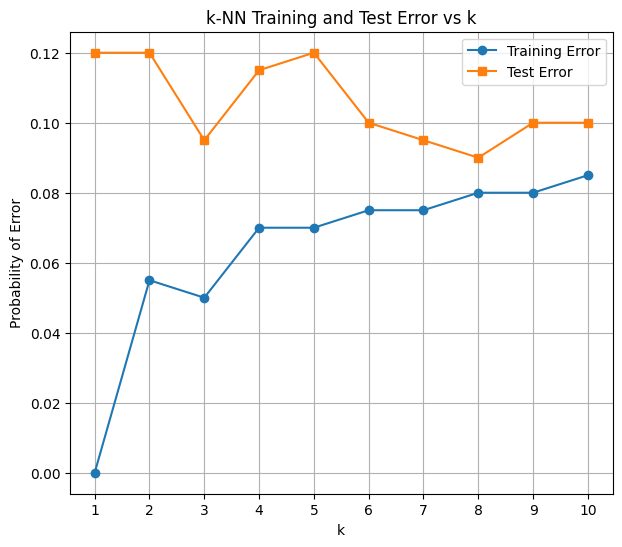

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('SenioritisTrainingData.csv')
test = pd.read_csv('SenioritisTestData.csv')

X_train = train[['ChemA', 'ChemB']].values
y_train = train['ClassLabel'].values

X_test = test[['ChemA', 'ChemB']].values
y_test = test['ClassLabel'].values

def knn_predict(x, k=3):
    x = np.atleast_2d(x)
    preds = []
    for xi in x:
        dists = np.linalg.norm(X_train - xi, axis=1)
        idx = np.argsort(dists)[:k]
        neighbors = y_train[idx]
        vals, counts = np.unique(neighbors, return_counts=True)
        preds.append(vals[np.argmax(counts)])
    return np.array(preds)

def prob_error(pred, y_true):
    return np.mean(pred != y_true)

ks = range(1, 11)
train_errors = []
test_errors = []

for k in ks:
    pred_train = knn_predict(X_train, k=k)
    pred_test = knn_predict(X_test, k=k)
    train_errors.append(prob_error(pred_train, y_train))
    test_errors.append(prob_error(pred_test, y_test))

plt.figure(figsize=(7,6))
plt.plot(ks, train_errors, marker='o', label='Training Error')
plt.plot(ks, test_errors, marker='s', label='Test Error')
plt.xlabel('k')
plt.ylabel('Probability of Error')
plt.title('k-NN Training and Test Error vs k')
plt.xticks(list(ks))
plt.legend()
plt.grid(True)
plt.show()

### (b)

_[I would recommend ]_